In [2]:
from sunpy.net import Fido, attrs as a
import sunpy.map 
import astropy.units as u
import matplotlib.pyplot as plt
import sunpy.data.sample

Fetch the data

In [20]:
from scipy.optimize import curve_fit
import numpy as np
from astropy.coordinates import SkyCoord

In [17]:
from aiapy.calibrate import register, update_pointing

In [11]:
import scipy.io as io

In [31]:
from scipy.interpolate import interp1d

In [3]:
#JSOC server is currently unavailable
result = Fido.search(a.Time('2010-11-03T12:15:09', '2010-11-03T12:15:19'), a.Instrument("aia"), a.Wavelength(171*u.angstrom))

In [4]:
files=Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [5]:
aia=sunpy.map.Map(files)

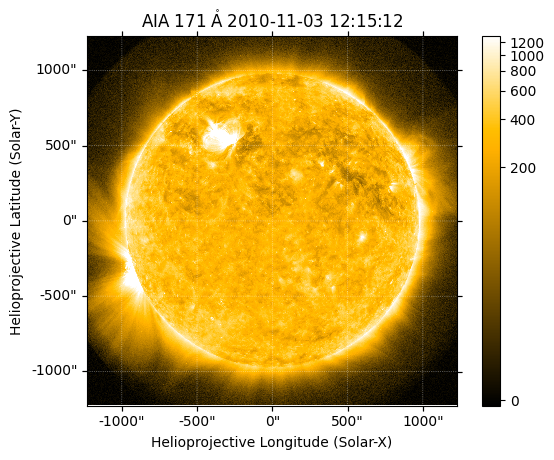

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot(axes=ax,clip_interval=(1,99.5)*u.percent)
plt.colorbar()
plt.show()

In [7]:
#JSOC server is unavailable
result = Fido.search(a.Time('2010-11-03T12:15:09', '2010-11-03T12:15:19'), a.Instrument("aia"), a.Wavelength(335*u.angstrom))

In [8]:
f=Fido.fetch(result)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [9]:
aia2=sunpy.map.Map(f)

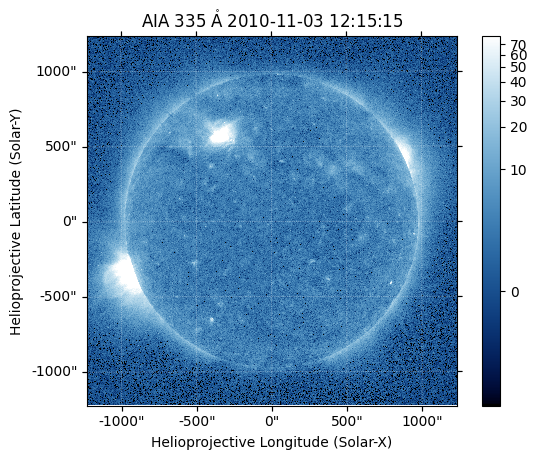

In [10]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia2)
aia2.plot(axes=ax,clip_interval=(1,99.5)*u.percent)
plt.colorbar()
plt.show()

Temperature Response Function Data

In [12]:
file_path=r'C:\Users\HP\Downloads\Sunpy\demreg\python\aia_tresp_en.dat'
trin=io.readsav(file_path)

In [13]:
e=trin['logt']

In [15]:
c=trin['tr'][2]

In [16]:
d=trin['tr'][5]

Prep the data

In [18]:
aprep=[]
m_temp=aia
aprep.append(register(m_temp))

In [19]:
m_temp=aia2
aprep.append(register(m_temp))

Crop for the coronal loop

In [21]:
blo=[-1150*u.arcsec,-500*u.arcsec]
tro=[-850*u.arcsec,-200*u.arcsec]

In [22]:
suba_maps=[]
for a in aprep:
    bottom_left = SkyCoord(blo[0],blo[1], frame=a.coordinate_frame)
    top_right = SkyCoord(tro[0],tro[1], frame=a.coordinate_frame)
    suba_maps.append(a.submap(bottom_left=bottom_left, top_right=top_right))

In [23]:
seq=sunpy.map.Map(suba_maps[0])
seq1=sunpy.map.Map(suba_maps[1])

Ratio of the intensity data

In [24]:
I_171=seq.data
I_335=seq1.data
R=I_171/(I_335+1e-6)

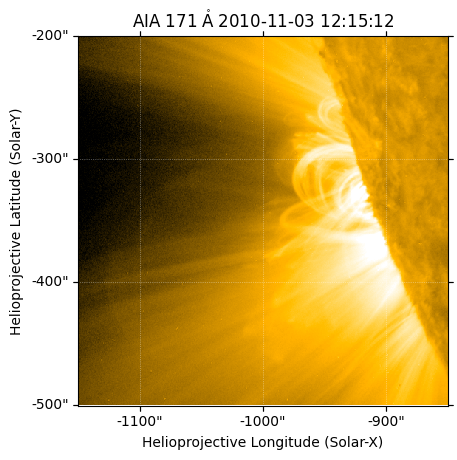

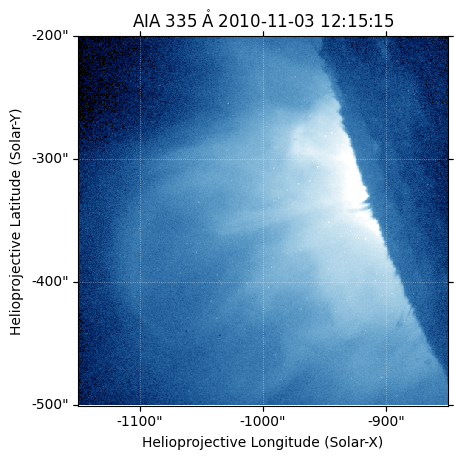

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection=seq)
seq.plot(axes=ax,clip_interval=(1,99.5)*u.percent)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection=seq1)
seq1.plot(axes=ax,clip_interval=(1,99.5)*u.percent)
plt.show()


Ratio of response functions

In [26]:
response_ratio = c / d

Interpolation of the Temperature Response Function

In [28]:
logT_estimated = logT_interp(R)  # logT for each pixel
temperature_estimated = 10 ** logT_estimated

In [32]:
logT_interp = interp1d(response_ratio, e, bounds_error=False, fill_value=np.nan)

In [33]:
print(temperature_estimated)

[[ 382331.16576161  288559.71484299  499992.87132976 ...  830451.18790533
  1195824.36829029  577281.50975027]
 [1367505.65391026  334331.7682883   408856.33271753 ... 1529259.47560448
  1088244.53465119  511830.30735011]
 [ 914414.33026943  334331.7682883   299840.89032461 ...  781509.10649962
   876485.49998017 1437373.56916201]
 ...
 [ 283079.30143624  387494.70154604  914413.44236045 ...  379059.88214733
   601413.63475843  702569.31907017]
 [1430044.04439178  307324.88643371  566763.27431338 ...  469484.7207624
   978677.1492277   989900.32579754]
 [ 334331.59729119  499992.59045036  467554.82619355 ...  548686.86983059
  1161233.97087227  506690.05742243]]


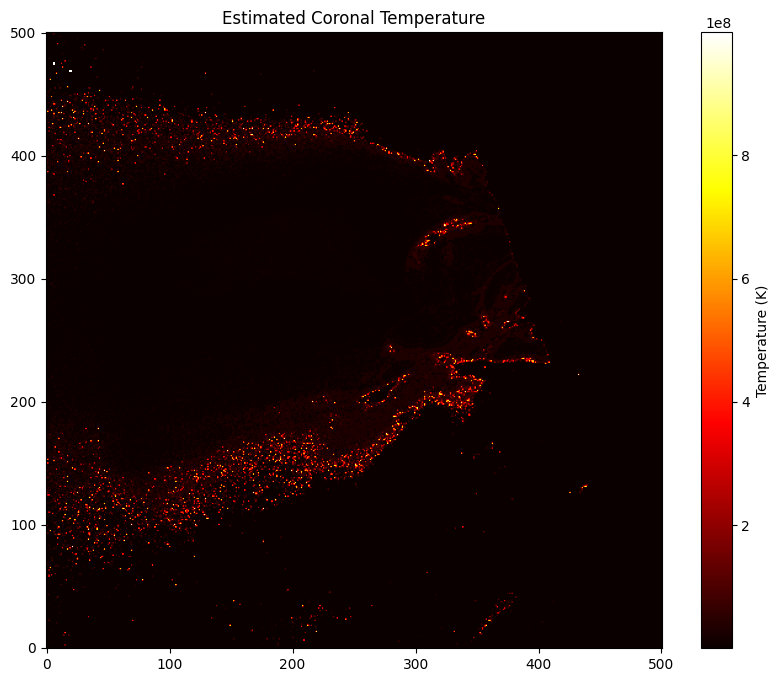

In [34]:
plt.figure(figsize=(10, 8))
plt.imshow(temperature_estimated, origin="lower", cmap="hot")
plt.colorbar(label="Temperature (K)")
plt.title("Estimated Coronal Temperature")
plt.show()